IMPLEMENTATION OF MAJOR PROJECT USING 4 CLASSIFICATION MODELS

1.LOGISTIC REGRESSION,   
2.DECISION TREE,  
3.RANDOM FOREST,   
4.NEURAL NETWORK

Logistic Regression
This is a classification model that use the concept of regression and later it convert the output values in between the range of 0 to 1.

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('/content/sample_data/heart.csv')

In [110]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [112]:
a = df.shape
print(f'Rows: {a[0]} and Columns: {a[1]}')

Rows: 303 and Columns: 14


In [113]:
df.isnull().sum().sum()

np.int64(0)

In [114]:
df.duplicated().sum()

np.int64(1)

In [115]:
df.drop_duplicates(inplace=True)

In [116]:
df.duplicated().sum()

np.int64(0)

In [117]:
df.shape

(302, 14)

OUTLIER ANALYSIS

In [118]:
import plotly.express as px

In [119]:
colList  = df.columns

In [120]:
colList

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [121]:
for x in colList:
  if df[x].dtype != 'object':
    fig = px.box(df[x],title =f'Box Plot of {x} column')
    fig.show()

In [122]:
outCols = ['ca', 'trestbps', 'chol', 'oldpeak']

In [123]:
for x in outCols:
  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)
  IQR = Q3 - Q1

  LF = Q1 - (1.5*IQR)
  UF = Q3 + (1.5*IQR)

  # Keep the values in between UF and LF
  df = df[(df[x]>=LF) & (df[x]<=UF)]

In [124]:
for x in colList:
  if df[x].dtype != 'object':
    fig = px.box(df[x],title =f'Box Plot of {x} column')
    fig.show()

In [125]:
df.shape

(264, 14)

CORRELATION MATRIX

In [126]:
numCols = df.select_dtypes(include=['number'])
numCols

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [127]:
numCols.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.068876,-0.039852,0.274234,0.133210,0.123181,-0.087816,-0.408814,0.082454,0.196252,-0.145261,0.378946,0.062630,-0.204387
sex,-0.068876,1.000000,-0.104919,0.003106,-0.134475,0.065505,-0.074163,-0.055096,0.177395,0.173375,-0.069522,0.088829,0.245519,-0.333662
cp,-0.039852,-0.104919,1.000000,0.108839,-0.034735,0.132472,0.053647,0.272529,-0.375769,-0.124201,0.087208,-0.206424,-0.173112,0.411402
trestbps,0.274234,0.003106,0.108839,1.000000,0.096174,0.135852,-0.132086,-0.029471,-0.014273,0.154853,-0.057997,0.058328,-0.002829,-0.085239
chol,0.133210,-0.134475,-0.034735,0.096174,1.000000,-0.027885,-0.120268,0.008317,0.046895,-0.023607,0.056136,0.091042,0.095068,-0.078406
fbs,0.123181,0.065505,0.132472,0.135852,-0.027885,1.000000,-0.069529,0.000763,0.007565,0.025442,-0.087445,0.108260,-0.103035,-0.013174
restecg,-0.087816,-0.074163,0.053647,-0.132086,-0.120268,-0.069529,1.000000,0.059333,-0.084629,-0.084767,0.110974,-0.082524,0.054382,0.131539
thalach,-0.408814,-0.055096,0.272529,-0.029471,0.008317,0.000763,0.059333,1.000000,-0.390205,-0.323913,0.364506,-0.227110,-0.102789,0.399364
exang,0.082454,0.177395,-0.375769,-0.014273,0.046895,0.007565,-0.084629,-0.390205,1.000000,0.348206,-0.267368,0.183988,0.224949,-0.425707
oldpeak,0.196252,0.173375,-0.124201,0.154853,-0.023607,0.025442,-0.084767,-0.323913,0.348206,1.000000,-0.528191,0.278337,0.185168,-0.439083


In [128]:
corrMat = df.corr(numeric_only=True)

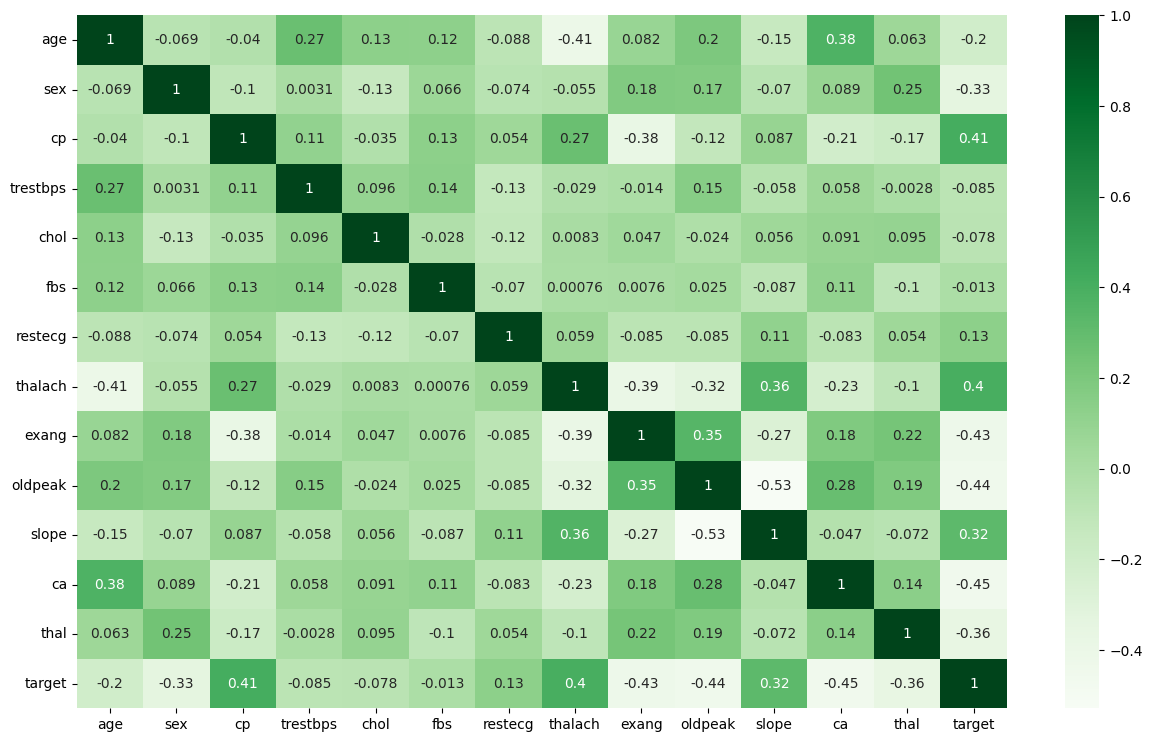

In [129]:
plt.figure(figsize = (15,9))
sns.heatmap(corrMat,cmap='Greens',annot = True)
plt.show()

NEED FOR ENCODING

In [130]:
catCol = []
for x in df.columns:
  if df[x].dtype =='object' and x !='y':
    catCol.append(x)

In [131]:
catCol #here there are no object columns, so no need of encoding

[]

DIVIDING THE DATASET INTO DEPENDENT(Y) AND INDEPENDENT DATASET

In [132]:
x = df.drop(columns=['target'])
y = df['target']

In [133]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [134]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


Now TRAIN, TEST AND SPLIT

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
x_train , x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state = 42)

In [137]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2


In [138]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3


In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
model = LogisticRegression()

In [141]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [142]:
y_pred = model.predict(x_test)

In [143]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0])

In [144]:
y_test

,target
71,1
213,0
86,1
285,0
119,1
128,1
123,1
194,0
10,1
289,0


### Hyperparameter Tuning for Logistic Regression

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(random_state=42, max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

# Assign the best estimator to best_lr_model
best_lr_model = grid_search.best_estimator_

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-validation Accuracy: 0.8527


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

In [146]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [147]:
accuracy_score(y_test,y_pred)

0.8867924528301887

In [148]:
confusion_matrix(y_test,y_pred)

array([[19,  4],
       [ 2, 28]])

In [149]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.88      0.93      0.90        30

    accuracy                           0.89        53
   macro avg       0.89      0.88      0.88        53
weighted avg       0.89      0.89      0.89        53





NOW,

2. DECISION TREE IMPLEMENTATION

In [150]:
df.isnull().sum().sum()

np.int64(0)

In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,264.0,53.818182,9.030424,29.0,46.00,54.5,60.0,76.0
sex,264.0,0.685606,0.465156,0.0,0.00,1.0,1.0,1.0
cp,264.0,0.996212,1.037319,0.0,0.00,1.0,2.0,3.0
trestbps,264.0,129.431818,15.371789,94.0,120.00,130.0,140.0,170.0
chol,264.0,241.761364,44.240613,126.0,209.00,239.0,269.0,360.0
fbs,264.0,0.128788,0.335601,0.0,0.00,0.0,0.0,1.0
restecg,264.0,0.534091,0.514775,0.0,0.00,1.0,1.0,2.0
thalach,264.0,150.571970,23.074242,71.0,136.75,155.0,168.0,202.0
exang,264.0,0.314394,0.465156,0.0,0.00,0.0,1.0,1.0
oldpeak,264.0,0.952273,1.034350,0.0,0.00,0.6,1.6,4.0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       264 non-null    int64  
 1   sex       264 non-null    int64  
 2   cp        264 non-null    int64  
 3   trestbps  264 non-null    int64  
 4   chol      264 non-null    int64  
 5   fbs       264 non-null    int64  
 6   restecg   264 non-null    int64  
 7   thalach   264 non-null    int64  
 8   exang     264 non-null    int64  
 9   oldpeak   264 non-null    float64
 10  slope     264 non-null    int64  
 11  ca        264 non-null    int64  
 12  thal      264 non-null    int64  
 13  target    264 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 30.9 KB


In [153]:
df.duplicated().sum()

np.int64(0)

In [154]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Dataset Analysis**

In [155]:
df.target.value_counts(normalize = True)*100

,proportion
target,
1,57.575758
0,42.424242


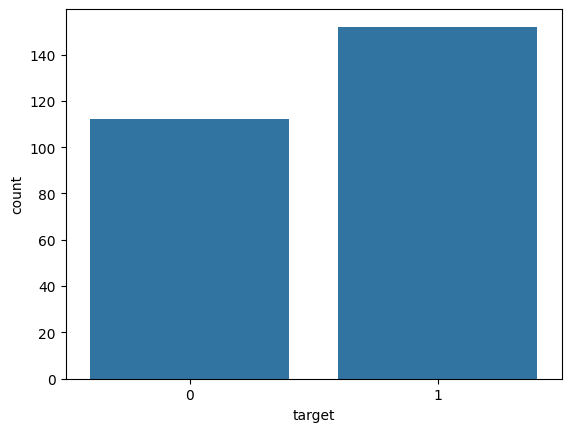

In [156]:
sns.countplot(data=df,x='target')
plt.show()

In [157]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

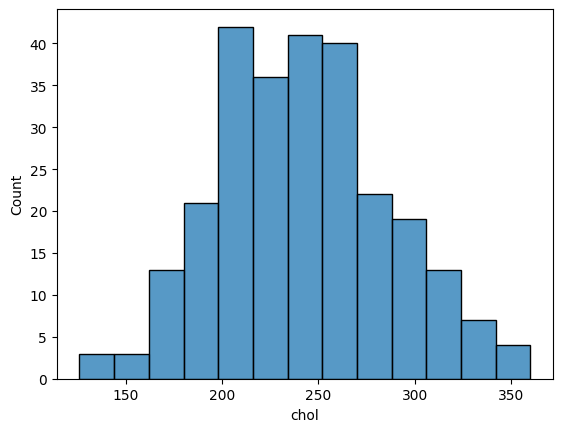

In [158]:
sns.histplot(data=df,x='chol')
plt.show()

In [159]:
df['chol'].skew()

np.float64(0.23088456705277405)

In [160]:
df['chol'].kurt()

np.float64(-0.19281401768700768)

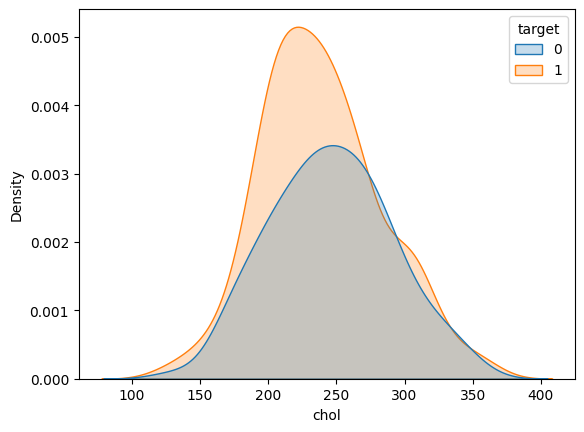

In [161]:
sns.kdeplot(data=df,x='chol',fill=True,hue='target')
plt.show()

### **Overlap in Distributions:**

 Both groups (with and without heart disease) show a significant overlap in their cholesterol level distributions. This suggests that while cholesterol might play a role, there isn't a very clear cutoff point where cholesterol levels definitively distinguish between healthy individuals and those with heart disease.

### **Graph Of Oldpeak VS Target**

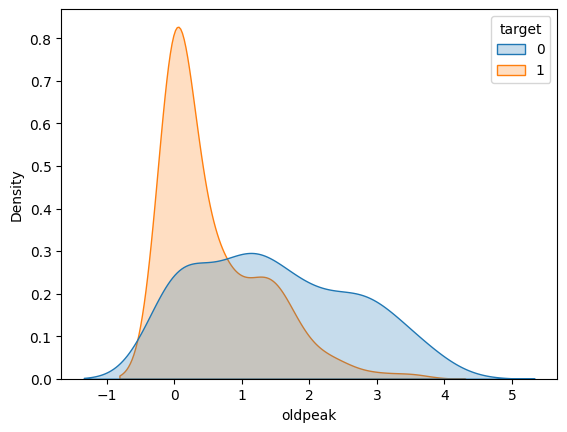

In [162]:
sns.kdeplot(data=df,x='oldpeak',hue='target',common_norm=False,fill=True)
plt.show()

ANALYSIS

Higher 'oldpeak' values are more prevalent in patients with heart disease

Lower 'oldpeak' values are more common in patients without heart disease

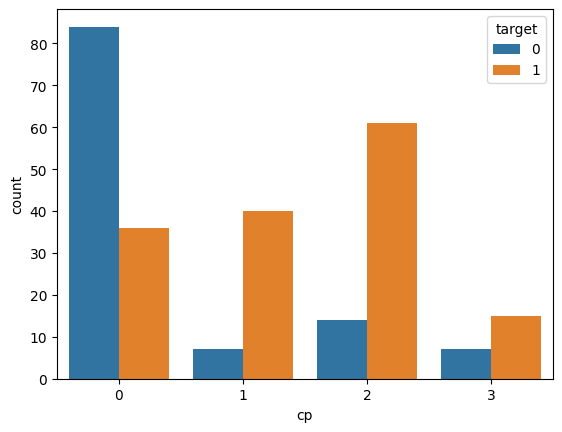

In [163]:
sns.countplot(data=df,x='cp',hue='target')
plt.show()

This countplot shows the frequency of each chest pain type (cp) separated by whether the individual has heart disease (target=1) or not (target=0). There are generally four types of chest pain:

Type 0: Asymptomatic (No Chest Pain)
Type 1: Atypical Angina
Type 2: Non-Anginal Pain
Type 3: Typical Angina

Now Splitting The Data for Model Building

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
xd = df.drop(['target'],axis = 1)
yd = df['target']

In [166]:
xd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [167]:
yd

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [168]:
xd_train ,xd_test, yd_train,yd_test = train_test_split(xd,yd,train_size=0.8,random_state=42)

In [169]:
xd_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2


In [170]:
xd_test


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3


Model Building

In [171]:
from sklearn.tree import DecisionTreeClassifier


In [172]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(xd_train,yd_train)

DecisionTreeClassifier(random_state=42)

In [173]:
yd_pred_dt = dt_model.predict(xd_test)

### Hyperparameter Tuning for Decision Tree Classifier

In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_model_tuned = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(estimator=dt_model_tuned, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_dt.fit(x_train, y_train);

print(f"Best Parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best Cross-validation Accuracy for Decision Tree: {grid_search_dt.best_score_:.4f}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validation Accuracy for Decision Tree: 0.7343


In [175]:
from sklearn.metrics import *
accuracy_score(yd_pred_dt,yd_test)

0.8490566037735849

In [176]:
confusion_matrix(yd_test,yd_pred_dt)

array([[21,  2],
       [ 6, 24]])

In [177]:
print(classification_report(yd_test,yd_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.92      0.80      0.86        30

    accuracy                           0.85        53
   macro avg       0.85      0.86      0.85        53
weighted avg       0.86      0.85      0.85        53



**3. Random Forest**

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
rf_model = RandomForestClassifier(random_state=42,n_estimators=200)
rf_model.fit(xd_train,yd_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [180]:
yd_pred_rf = rf_model.predict(xd_test)

EVALUATION OF RF

In [181]:
accuracy_score(yd_pred_rf,yd_test)

0.8301886792452831

In [182]:
confusion_matrix(yd_test,yd_pred_rf)

array([[19,  4],
       [ 5, 25]])

In [183]:
print(classification_report(yd_test,yd_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.86      0.83      0.85        30

    accuracy                           0.83        53
   macro avg       0.83      0.83      0.83        53
weighted avg       0.83      0.83      0.83        53



4. Neural Networks Implementation

In [184]:
pip install tensorflow

In [185]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [186]:
df = pd.read_csv('/content/sample_data/heart.csv')

In [187]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [188]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [190]:
df = df.astype('float32')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float32
 1   sex       303 non-null    float32
 2   cp        303 non-null    float32
 3   trestbps  303 non-null    float32
 4   chol      303 non-null    float32
 5   fbs       303 non-null    float32
 6   restecg   303 non-null    float32
 7   thalach   303 non-null    float32
 8   exang     303 non-null    float32
 9   oldpeak   303 non-null    float32
 10  slope     303 non-null    float32
 11  ca        303 non-null    float32
 12  thal      303 non-null    float32
 13  target    303 non-null    float32
dtypes: float32(14)
memory usage: 16.7 KB


In [192]:
df=df.to_numpy()

In [193]:
df

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]], dtype=float32)

In [194]:
df.shape

(303, 14)

In [195]:
training = df[0:242]
testing = df[242:]

In [196]:
print(training.shape)
print(testing.shape)

(242, 14)
(61, 14)


In [197]:
training_features = training[:,0:13]
training_labels = training[:,13]
testing_features = testing[:,0:13]
testing_labels = testing[:,13]

In [198]:
print(training_features.shape)
print(training_labels.shape)


(242, 13)
(242,)


In [199]:
training_features[0].shape

(13,)

In [200]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

In [201]:
#model definition
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [202]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
    )

In [203]:
model.fit(training_features,training_labels,epochs=10)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3308 - loss: 82.8549
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3097 - loss: 69.8491 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2930 - loss: 64.9448 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3037 - loss: 52.2348 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3288 - loss: 41.3169 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3731 - loss: 36.6625 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3331 - loss: 34.6541 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3481 - loss: 30.2216 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3243 - loss: 29.7560 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3787 - loss: 23.4722 


In [204]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_features_scaled = scaler.fit_transform(training_features)
testing_features_scaled = scaler.transform(testing_features)



In [205]:
print("Original training features shape:", training_features.shape)
print("Scaled training features shape:", training_features_scaled.shape)
print("Original testing features shape:", testing_features.shape)
print("Scaled testing features shape:", testing_features_scaled.shape)
# Display a sample of the scaled data
print("\nSample of scaled training features (first 5 rows):\n", training_features_scaled[:5])

Original training features shape: (242, 13)
Scaled training features shape: (242, 13)
Original testing features shape: (61, 13)
Scaled testing features shape: (61, 13)

Sample of scaled training features (first 5 rows):
 [[0.7083333  1.         1.         0.4811321  0.24429226 1.
  0.         0.509434   0.         0.37096775 0.         0.
  0.33333334]
 [0.16666669 1.         0.6666667  0.33962268 0.28310502 0.
  0.5        0.8584906  0.         0.5645162  0.         0.
  0.6666667 ]
 [0.25       0.         0.33333334 0.33962268 0.1780822  0.
  0.         0.7169812  0.         0.22580646 1.         0.
  0.6666667 ]
 [0.56250006 1.         0.33333334 0.24528307 0.25114155 0.
  0.5        0.77358496 0.         0.12903227 1.         0.
  0.6666667 ]
 [0.5833333  0.         0.         0.24528307 0.5205479  0.
  0.5        0.6320754  1.         0.09677421 1.         0.
  0.6666667 ]]


In [206]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
    )

In [207]:
model.fit(training_features_scaled, training_labels, epochs=10)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6013 - loss: 0.6918
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6469 - loss: 0.6738
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6916 - loss: 0.6647
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6887 - loss: 0.6640
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7379 - loss: 0.6385
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7065 - loss: 0.6350
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6957 - loss: 0.6207 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7411 - loss: 0.6100
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7288 - loss: 0.6166
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7013 - loss: 0.5975


In [208]:
loss, accuracy = model.evaluate(testing_features_scaled, testing_labels)
print(f"Neural Network Test Loss: {loss:.4f}")
print(f"Neural Network Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.3644 - loss: 0.8073
Neural Network Test Loss: 0.8190
Neural Network Test Accuracy: 0.3279


**INTERPRETATION OF KEY FACTORS CONTRIBUTING TO HEART DISEASE:**

Based on the correlation matrix and the data analysis performed, here are some key factors that appear to be strongly associated with heart disease:

**Chest Pain Type (cp)**: Shows a strong positive correlation with heart disease.

**Exercise Induced Angina (exang)**: Has a strong negative correlation.

**ST Depression induced by exercise relative to rest (oldpeak)**: Also shows a strong negative correlation. Higher 'oldpeak' values are more prevalent in patients with heart disease, and lower values in those without it.


 MODEL EVALUATION RANKS                                                 
1.Logistic Regression: Test Accuracy: 0.8868 (88.68%)  
2.Decision Tree: Test Accuracy: 0.8491 (84.91%)  
3.Random Forest: Test Accuracy: 0.8302 (83.02%)  
4.Neural Network: Test Accuracy: 0.6066 (60.66%)

**Deploying the Model**

In [209]:
!pip install -q gradio

In [214]:
import gradio as gr

In [223]:
def make_prediction(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):

  preds = best_lr_model.predict([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]) #logistic-regression model
  if preds[0]==0:
      return "You do not have a heart disease"
  return "You have a heart disease"

age_input = gr.Number(label="Age")
sex_input = gr.Number(label="enter sex:{0:'female', 1:'male'}")
cp_input = gr.Number(label="enter cp:{0, 1, 2, 3}")
trestbps_input = gr.Number(label="enter trestbps")
chol_input = gr.Number(label="enter chol")
fbs_input = gr.Number(label="enter fbs:{0:'normal', 1:'high'}")
restecg_input = gr.Number(label="enter restecg:{0, 1, 2}")
thalach_input = gr.Number(label="enter thalach")
exang_input = gr.Number(label="enter exang:{0:'no', 1:'yes'}")
oldpeak_input = gr.Number(label="enter oldpeak")
slope_input = gr.Number(label="enter slope:{0, 1, 2}")
ca_input = gr.Number(label="enter ca:{0, 1, 2, 3}")
thal_input = gr.Number(label="enter thal:{0, 1, 2, 3}")
output=gr.Textbox()

custom_css = """
#component-output-0 { background-color: #800080; }
"""

app = gr.Interface(fn= make_prediction,
                   inputs=[age_input, sex_input, cp_input, trestbps_input, chol_input, fbs_input, restecg_input, thalach_input, exang_input, oldpeak_input, slope_input, ca_input, thal_input],
                   outputs=output,
                   title = 'Heart Disease Prediction - YASH MHASKE',
                  description = 'You can predict the possibility of a heart disease',
                  css=custom_css)
app.launch(debug=False)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://16280d13e604f00f65.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
